In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq
from earthfun import earthfun
from stress_disp_tor import stress_disp_tor
from surf_stress import surf_stress
import spshell_config

plt.rcParams['figure.figsize'] = 12, 8
plt.rcParams['lines.linewidth'] = 1

# This program computes the toroidal modes for a spherical shell with
# uniform rigidity and density.

#Python adaptation of spshell_template.m by Charles Ammon (Penn State, 2000), modified by Carl Tape (UAF, 2012) 
# for GEOS626.
# This program computes the toroidal modes for a spherical shell with
# uniform rigidity and density.

# calls these functions:
#    stress_disp_tor.m
#    surf_stress.m
#    earthfun.m

# GLOBAL VARIABLES: l rvec WT rspan imod mu rho
# Global variables are stored in spshell_config, where they can be accessed by each module that needs them
# Global variables can be overwritten by values defined in other functions

# Run this cell once at the beginning of each session

In [2]:
# Define constants:
# Run again after each time you do calculations to reset!!

# shell spans from core-mantle boundary (b) to surface (a)
earthr = 6371000.0      #radius of earth, in meters (a)
cmbr = 3480000.0        #radius of core-mantle boundary, in meters (b)
rspan = np.array([cmbr, earthr]) #[b a]

# Earth model
imod = 0    # Index for earth model (see earthfun.py)
            # = 0 for homogeneous
            # = 1 for linear rho(r) and mu(r)
            # = 2 for cubic rho(r) and mu(r)
rho = 4380             # density
mu  = 5930*5930*rho    # rigidity (mu = 1.54e11)

# options for searching solution space
l = 2                  # degree (l >= 1)
nmax = 8               # maximum n (default = 8)
                        # nmax+1 is the max number of roots/eigenfunctions/subplots
                        # nmax=0 will return the first root (n=0)
        
# plotting options                        
iplot_eig_freqs = 1    # plot eigenfunctions (=1) or not (=0)
                        # =0 will speed up the calculations
iplot_all_freqs = 1    # plot eigenfunctions for all input frequencies,
                        # including those that do not satisfy the boundary conditions
                        # =1 for initial problem only


# Path to directory with the data set
# ddir = ./data

# range of frequencies (note: omega = 2*pi*f), in Hz
fmin = 1/3600      # the initial frequency to start (period = one hour)
df = 0.0002        # the frequency step size (chosen by trial and error)
#fmax = 0.08        # stopping frequency (somewhat arbitrary)
fmax = 0.003
fvec = np.arange(fmin,fmax,df)
numf = len(fvec)

print('frequency vector ranges from %.3f mHz to %.3f mHz'% (fmin*1e3,fmax*1e3))
print('num frequency points is %i, df = %.3f mHz'% (numf,df*1e3))
print('--> period ranges from %.2f min to %.2f min'% (1/fmin/60,1/fmax/60))
    
spshell_config.rspan = rspan # update variable for module
spshell_config.rho = rho # update variable for module
spshell_config.mu = mu # update variable for module
spshell_config.l = l
spshell_config.imod = imod

plt.close('all')

frequency vector ranges from 0.278 mHz to 3.000 mHz
num frequency points is 14, df = 0.200 mHz
--> period ranges from 60.00 min to 5.56 min


 1/14: f = 0.278 mHz
 2/14: f = 0.478 mHz
 3/14: f = 0.678 mHz
 4/14: f = 0.878 mHz
 5/14: f = 1.078 mHz
 6/14: f = 1.278 mHz
 7/14: f = 1.478 mHz
 8/14: f = 1.678 mHz
 9/14: f = 1.878 mHz
10/14: f = 2.078 mHz
11/14: f = 2.278 mHz
12/14: f = 2.478 mHz
13/14: f = 2.678 mHz
14/14: f = 2.878 mHz


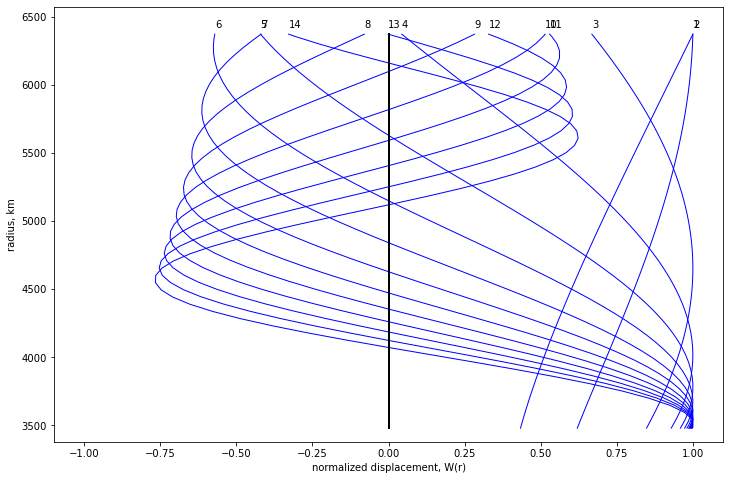

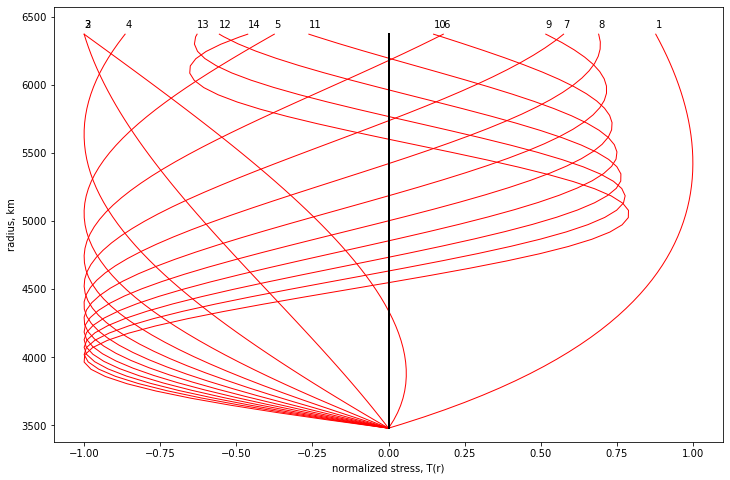

In [3]:
# This block is for initial plotting only!

if iplot_all_freqs == 1:
    for ii in range(numf):
        print('%2i/%2i: f = %.3f mHz'% (ii+1,numf,fvec[ii]*1e3))
        
        if ii == 0:
            fig2, ax2 = plt.subplots(num=2)
            fig3, ax3 = plt.subplots(num=3)
        
        # update W(r) and T(r), stored within WT
        surf_stress(fvec[ii])
        
        # grab updated W(r), T(r), and rvec
        WT = spshell_config.WT # Grab updated WT
        rvec = spshell_config.rvec # Grab updated rvec
        
        # plotting parameters (radius converted to km)
        rplot = rvec / 1000
        xmx = 1.1
        ymn = rspan[0]/1000
        ymx = rspan[1]/1000
        dy = 100
        
        # displacement for each frequency
        Wplot = WT[0,:]/max(abs(WT[0,:]))
        ax2.plot(Wplot,rplot,'b')
        ax2.plot([0,0],rspan/1000,'k',lw=2)
        ax2.text(Wplot[-1],rplot[-1]+dy/2,str(ii+1))
        ax2.axis([-xmx, xmx, ymn-dy, ymx+2*dy])
        ax2.set(xlabel='normalized displacement, W(r)',ylabel='radius, km')
        
        # stress for each frequency
        Tplot = WT[1,:]/max(abs(WT[1,:]))
        ax3.plot(Tplot,rplot,'r')
        ax3.plot([0,0],rspan/1000,'k',lw=2)
        ax3.text(Tplot[-1],rplot[-1]+dy/2,str(ii+1))
        ax3.axis([-xmx, xmx, ymn-dy, ymx+2*dy])
        ax3.set(xlabel='normalized stress, T(r)',ylabel='radius, km')
        
plt.show()

freq   1/ 14        nan  2.201e+04 0.28 mHz 3600.0 s 60.00 min
freq   1/ 14  2.201e+04 -3.600e+04 0.48 mHz 2093.0 s 34.88 min
T(a)=0 --> n=0 0.357 mHz l=2
freq   2/ 14 -3.600e+04 -8.368e+04 0.68 mHz 1475.4 s 24.59 min
freq   3/ 14 -8.368e+04 -9.197e+04 0.88 mHz 1139.2 s 18.99 min
freq   4/ 14 -9.197e+04 -4.977e+04 1.08 mHz 927.8 s 15.46 min
freq   5/ 14 -4.977e+04  2.910e+04 1.28 mHz 782.6 s 13.04 min
T(a)=0 --> n=1 1.210 mHz l=2
freq   6/ 14  2.910e+04  1.103e+05 1.48 mHz 676.7 s 11.28 min
freq   7/ 14  1.103e+05  1.535e+05 1.68 mHz 596.0 s 9.93 min
freq   8/ 14  1.535e+05  1.310e+05 1.88 mHz 532.5 s 8.88 min
freq   9/ 14  1.310e+05  4.221e+04 2.08 mHz 481.3 s 8.02 min
freq  10/ 14  4.221e+04 -8.285e+04 2.28 mHz 439.0 s 7.32 min
T(a)=0 --> n=2 2.148 mHz l=2
freq  11/ 14 -8.285e+04 -1.936e+05 2.48 mHz 403.6 s 6.73 min
freq  12/ 14 -1.936e+05 -2.391e+05 2.68 mHz 373.4 s 6.22 min


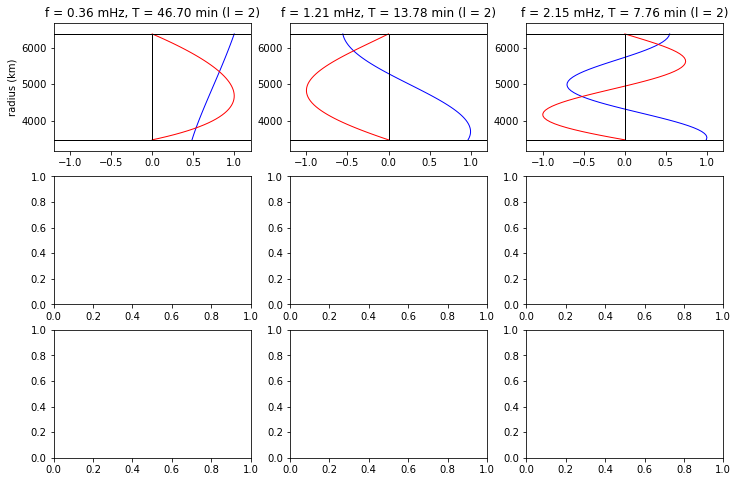

/// l = 2, nroots = 3 (nmax = 8, fmax = 3.000 mHz)



In [4]:
# initial freqeuncy and corresponding surface stress
# NOTE: surf_stress.m calls stress_disp_tor.m, which depends on degree l

ii = 0
f = fvec[ii]
Tsurf = surf_stress(f)
n = 0   # counter for n (n=0 is the first root)

print('freq %3i/%3i %10.3e %10.3e %.2f mHz %.1f s %.2f min'% (ii+1, numf, np.nan, Tsurf, f*1e3, 1/f, 1/f/60))

# leave gap for T(n=0,l=1), which do not exist
# note: these are useful when looping over degree l
if l == 1 and nmax > 0: # fill the n >= 1 entries
    n = 1
            
if l == 1 and nmax == 0: # Breaks 
    raise Exception('mode 0T1 does not exist - check your l and nmax value')

froots = np.full((nmax+1,1),np.nan)

# Initialize figure
if iplot_eig_freqs == 1:
    if nmax == 0:
        fig, ax = plt.subplots(nrows=1,ncols=1)
    else:
        fig, ax = plt.subplots(nrows=3,ncols=3)

# THIS IS THE KEY LOOP OVER FREQUENCIES
for ii in range(1,len(fvec)-1):  # loop over the frequencies
    oldf = f
    f = fvec[ii]
            
    # compute the surface stress for this frequency
    Tsurfold = Tsurf
    Tsurf = surf_stress(f)

    print('freq %3i/%3i %10.3e %10.3e %.2f mHz %.1f s %.2f min'% (ii, numf, Tsurfold, Tsurf, f*1e3, 1/f, 1/f/60))
    
    if Tsurfold * Tsurf < 0:
        f0 = brentq(surf_stress,oldf,f)
        froots[n,0] = f0
                
        # update eigenfunctions (WT, rvec) for the exact frequency
        surf_stress(f0)
        WT = spshell_config.WT
        rvec = spshell_config.rvec
        print('T(a)=0 --> n=%i %.3f mHz l=%i'% (n,f0*1e3,l))
        
        # plotting eigenfunctions (displacement and stress as a function of radius)
        #txt = 'n = %i'% (n)
        if iplot_eig_freqs == 1:
            # normalize each eigenfunction by its max value
            Wplot = WT[0,:]/max(abs(WT[0,:]))
            Tplot = WT[1,:]/max(abs(WT[1,:]))
            
            # plotting
            xmx = 1.2
            ymn = rspan[0]
            ymx = rspan[1]
            
            if nmax == 0:
                ax.plot(Wplot,rvec/1000,'b')    # W(r), displacement (blue)
                ax.plot(Tplot,rvec/1000,'r')    # T(r), stress (red)
                ax.plot([-xmx, xmx],ymn/1000*np.ones(2),'k')
                ax.plot([-xmx, xmx],ymx/1000*np.ones(2),'k')
                ax.plot(np.zeros(2),np.array([ymn, ymx])/1000,'k')
                
                ax.axis([-xmx, xmx, ymn/1000-300, ymx/1000+300])
                ax.set(title='f = %.2f mHz, T = %.2f min (l = %i)'% (froots[n]*1000,1/f0/60,l))
                #ax.text(-1,ymx+100,'n = %i'% (n))
            
                if n % 3 == 0:
                    ax.set(ylabel='radius (km)')
                    
            else:
                if n == 0 or n == 3 or n == 6: 
                    col = 0
                elif n == 1 or n == 4 or n == 7:
                    col = 1
                elif n == 2 or n == 5 or n == 8:
                    col = 2
                            
                if n == 0 or n == 1 or n == 2: 
                    row = 0
                elif n == 3 or n == 4 or n == 5:
                    row = 1
                elif n == 6 or n == 7 or n == 8:
                    row = 2
                    
                ax[row,col].plot(Wplot,rvec/1000,'b')    # W(r), displacement (blue)
                ax[row,col].plot(Tplot,rvec/1000,'r')    # T(r), stress (red)
                ax[row,col].plot([-xmx, xmx],ymn/1000*np.ones(2),'k')
                ax[row,col].plot([-xmx, xmx],ymx/1000*np.ones(2),'k')
                ax[row,col].plot(np.zeros(2),np.array([ymn, ymx])/1000,'k')
                
                ax[row,col].axis([-xmx, xmx, ymn/1000-300, ymx/1000+300])
                ax[row,col].set(title='f = %.2f mHz, T = %.2f min (l = %i)'% (froots[n]*1000,1/f0/60,l))
                #ax[row,col].text(-1,ymx+100,txt)
            
                if n % 3 == 0:
                    ax[row,col].set(ylabel='radius (km)')
                    
        if n == nmax:   # leave the loop when you reach n=nmax
            break
        
        n += 1
        
plt.show()
print('/// l = %i, nroots = %i (nmax = %i, fmax = %.3f mHz)\n'% (l,sum(~np.isnan(froots)),nmax,fmax*1e3))
            

In [5]:
# Toroidal mode observations in PREM
# Must have prem_Tmodes.txt in working directory

nobs, lobs, Tobs, Tobs_std = np.loadtxt('prem_Tmodes.txt',usecols=(0,2,3,4),unpack=True)
nobs = nobs.astype(int)
lobs = lobs.astype(int)
print('normal mode observations (measured from seismograms):')

for ii in range(len(nobs)):
    print('n = %i, l = %2i, T = %8.2f +/- %.2f s'% (nobs[ii],lobs[ii],Tobs[ii],Tobs_std[ii]))
    
# It may be useful to store them in a matrix
maxl = max(lobs)
maxn = max(nobs)
Tmat = np.full((maxn+1,maxl),np.nan)

for ii in range(len(nobs)):
    Tmat[nobs[ii],lobs[ii]-1] = Tobs[ii]

normal mode observations (measured from seismograms):
n = 0, l =  2, T =  2636.38 +/- 0.08 s
n = 0, l =  3, T =  1705.95 +/- 0.15 s
n = 0, l =  4, T =  1305.92 +/- 0.07 s
n = 0, l =  5, T =  1075.98 +/- 0.12 s
n = 0, l =  6, T =   925.84 +/- 0.09 s
n = 0, l =  7, T =   819.31 +/- 0.08 s
n = 0, l =  8, T =   736.86 +/- 0.20 s
n = 0, l =  9, T =   671.80 +/- 0.20 s
n = 0, l = 10, T =   618.97 +/- 0.20 s
n = 1, l =  2, T =   756.57 +/- 0.08 s
n = 1, l =  3, T =   695.18 +/- 0.07 s
n = 1, l =  6, T =   519.09 +/- 0.06 s
n = 1, l =  7, T =   475.17 +/- 0.13 s
n = 1, l =  8, T =   438.49 +/- 0.05 s
n = 1, l =  9, T =   407.74 +/- 0.07 s
n = 1, l = 10, T =   381.65 +/- 0.10 s
n = 2, l =  4, T =   420.46 +/- 0.07 s
n = 2, l =  7, T =   363.65 +/- 0.07 s
n = 2, l =  8, T =   343.34 +/- 0.06 s
n = 3, l =  9, T =   259.26 +/- 0.07 s


In [52]:
# example code for calculating misfit in arrays with NaN
# say that A is observations, B is predictions

A = np.random.randn(4,10)
A[[2, 3, 0, 2],[0, 9, 3, 1]] = np.nan

B = np.random.randn(4,10)
B[[3, 1, 1],[7, 8, 2]] = np.nan

a = A.flatten(order='F')
b = B.flatten(order='F')
r = a - b

# You can't sum a vector that has NaN in it
print(sum(r**2))

# So just sum the values that are NOT NaN
dmis = sum(r[~np.isnan(r)])
print(dmis)

nan
4.057567777022424
